In [24]:
import pandas as pd
import matplotlib.pyplot as plt 

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [25]:
df=pd.read_csv('C:\Data\Custom\salaries.csv')
df

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0
5,google,computer programmer,masters,1
6,abc pharma,sales executive,masters,0
7,abc pharma,computer programmer,bachelors,0
8,abc pharma,business manager,bachelors,0
9,abc pharma,business manager,masters,1


<AxesSubplot:xlabel='company'>

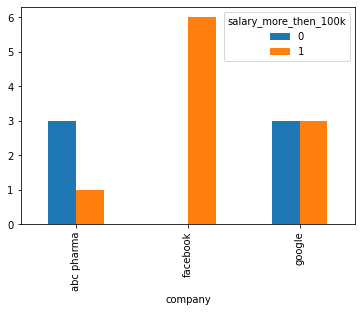

In [26]:
pd.crosstab(df['company'],df['salary_more_then_100k']).plot(kind='bar')

<AxesSubplot:xlabel='job'>

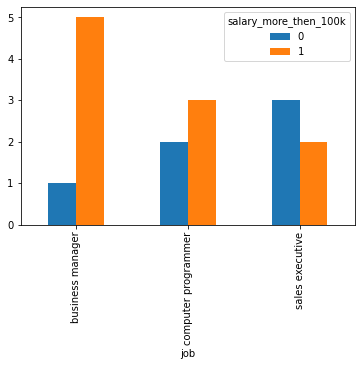

In [27]:
pd.crosstab(df['job'],df['salary_more_then_100k']).plot(kind='bar')

<AxesSubplot:xlabel='degree'>

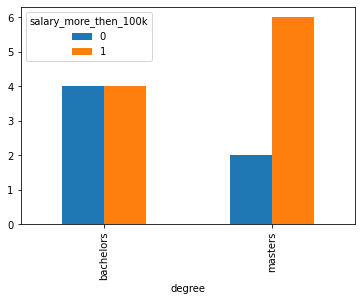

In [28]:
pd.crosstab(df['degree'],df['salary_more_then_100k']).plot(kind='bar')

In [29]:
x=df[['company','job','degree']]
y=df['salary_more_then_100k']

In [30]:
ct=ColumnTransformer([('',OneHotEncoder(),[0,1,2])],remainder='passthrough')
x=ct.fit_transform(x)

In [31]:
x

array([[0., 0., 1., 0., 0., 1., 1., 0.],
       [0., 0., 1., 0., 0., 1., 0., 1.],
       [0., 0., 1., 1., 0., 0., 1., 0.],
       [0., 0., 1., 1., 0., 0., 0., 1.],
       [0., 0., 1., 0., 1., 0., 1., 0.],
       [0., 0., 1., 0., 1., 0., 0., 1.],
       [1., 0., 0., 0., 0., 1., 0., 1.],
       [1., 0., 0., 0., 1., 0., 1., 0.],
       [1., 0., 0., 1., 0., 0., 1., 0.],
       [1., 0., 0., 1., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0., 1., 1., 0.],
       [0., 1., 0., 0., 0., 1., 0., 1.],
       [0., 1., 0., 1., 0., 0., 1., 0.],
       [0., 1., 0., 1., 0., 0., 0., 1.],
       [0., 1., 0., 0., 1., 0., 1., 0.],
       [0., 1., 0., 0., 1., 0., 0., 1.]])

In [32]:
model=DecisionTreeClassifier()
model.fit(x,y)

DecisionTreeClassifier()

In [33]:
model.score(x,y)

1.0

In [35]:
model.predict([[0,0,1,1,0,0,0,1]])

array([1], dtype=int64)

In [36]:
import joblib
joblib.dump(model,'JModel')

['JModel']

In [39]:
Jmodel=joblib.load('JModel')

In [41]:
Jmodel.predict([[0,0,1,1,0,0,0,1]])

array([1], dtype=int64)